In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('D:\Ds\iris.data')
train.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
train = train.drop('id', 1)
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
train.rename(columns = {cols[0]:0, cols[1]:1, cols[2]:2, cols[3]:3}, inplace=True)
train['distance'] = 9999
train.head()

C:\Users\user\AppData\Local\Temp/ipykernel_15116/3713745638.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train = train.drop('id', 1)


,0,1,2,3,species,distance
0,5.1,3.5,1.4,0.2,Iris-setosa,9999
1,4.9,3.0,1.4,0.2,Iris-setosa,9999
2,4.7,3.2,1.3,0.2,Iris-setosa,9999
3,4.6,3.1,1.5,0.2,Iris-setosa,9999
4,5.0,3.6,1.4,0.2,Iris-setosa,9999


In [4]:
target = pd.Series([7.0, 3.1, 5.6, 1.9])
target

0    7.0
1    3.1
2    5.6
3    1.9
dtype: float64

In [5]:
train['distance'] = ((train.loc[:,0]-target[0])**2 + (train.loc[:,1]-target[1])**2 + (train.loc[:,2]-target[2])**2 + (train.loc[:,3]-target[3])**2) ** 0.5
train.loc[::10]

,0,1,2,3,species,distance
0,5.1,3.5,1.4,0.2,Iris-setosa,4.929503
10,5.4,3.7,1.5,0.2,Iris-setosa,4.756049
20,5.4,3.4,1.7,0.2,Iris-setosa,4.555217
30,4.8,3.1,1.6,0.2,Iris-setosa,4.871345
40,5.0,3.5,1.3,0.3,Iris-setosa,5.020956
50,7.0,3.2,4.7,1.4,Iris-versicolor,1.034408
60,5.0,2.0,3.5,1.0,Iris-versicolor,3.229551
70,5.9,3.2,4.8,1.8,Iris-versicolor,1.367479
80,5.5,2.4,3.8,1.1,Iris-versicolor,2.572936
90,5.5,2.6,4.4,1.2,Iris-versicolor,2.104757


In [6]:
k = 7
train = train.sort_values('distance', ascending=True)
knn = list(train.head(k).species)
knn

['Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica']

In [7]:
from statistics import mode
print(mode(knn))

Iris-virginica


Text(0.5, 1.0, 'Iris Data Scatter Plot')

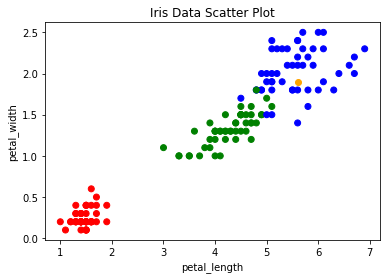

In [8]:
import matplotlib.pyplot as plt
colors = {'Iris-setosa':'red', 'Iris-virginica':'blue', 'Iris-versicolor':'green'}
plt.scatter(
    train[2], 
    train[3], 
    c=train['species'].map(colors))
plt.scatter(target[2], target[3], c='orange')
plt.xlabel(cols[2])
plt.ylabel(cols[3])
plt.title('Iris Data Scatter Plot')